# 1 практическое задание. Полносвязная нейронная сеть на `numpy`.

## Практикум на ЭВМ для 317 группы, весна 2021

#### Фамилия, имя: Васильев Руслан

Дата выдачи: <span style="color:red">__4 марта 02:00__</span>.

Мягкий дедлайн: <span style="color:red">__17 марта 23:59__</span>.

Стоимость: __10 баллов__ (основная часть заданий) + __3 балла__ (дополнительные задания).

<span style="color:red">__В ноутбуке все клетки должны выполняться без ошибок при последовательном их выполнении.__</span>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True, grid=True)
plt.rc('grid', c='grey', ls=':')
plt.rc('font', family='serif')

## Теоретическая часть (3 балла)

В этом блоке вам нужно решить 3 задания.

### Задание 1. Градиенты для слоя Batch normalization (1.5 балла)

Рассмотрим слой Batch normalization. Пусть на вход этого слоя был подан батч из $n$ объектов, при этом у всех объектов по 1 признаку. Представим вход BN слоя в виде $X \in \mathbb{R}^{n \times 1}$.

Тогда в этом слое производятся следующие вычисления:

$$ \mu = \frac1n \sum_{i=1}^{n} X_i $$

$$ \sigma^2 = \frac1n \sum_{i=1}^{n} \left( X_i - \mu \right) ^2 $$

$$ \tilde{y_i} = \frac{X_i - \mu}{\sqrt{\sigma^2 + \varepsilon}} $$

$$ y_i = \gamma \tilde{y_i} + \delta $$

Выходом BN слоя является $y_i$, а $\gamma$ и $\delta$ в нем — параметры, которые подбираются во время обучения вместе с другими параметрами нейронной сети (наряду, например, с весами линейного слоя).

Рассмотрим нейронную сеть, в которой есть BN слой. Предположим, что вычисления в нейронной завершаются подсчетом функции потерь $\mathcal{L}$. Пусть мы выполнили прямой проход по нейронной сети и сейчас делаем обратный проход с помощью метода обратного распространения ошибки. Пусть BN слою пришел градиент функции потерь по выходу BN слоя ($\nabla_{y} \mathcal{L}$).

В этом задании вам нужно записать вычисление градиента функции потерь по параметрам слоя BN $\gamma$ и $\delta$ ($\nabla_{\gamma} \mathcal{L}$, $\nabla_{\delta} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$, а также вам нужно записать вычисление градиента функции потерь по входу слоя BN $X$ ($\nabla_{X} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$.

Хочу заметить, в данном задании мы рассматриваем объекты всего с 1 признаком, чтобы упростить выкладки.

__Ваше решение:__

<font color=blue>Далее $\vec{1}$ — вектор из единиц.</font>

$$d\mathcal{L}=\langle\nabla_y\mathcal{L}, dy\rangle,\quad
dy=d(\gamma \tilde{y}+\delta\vec{1})=\tilde{y}d\gamma + \vec{1}d\delta\; (+\gamma d\tilde{y})\quad\implies
$$

$$
\nabla_{\gamma} \mathcal{L}=\tilde{y}^T\nabla_y\mathcal{L}=\langle\nabla_y\mathcal{L},\tilde{y}\rangle
$$

$$
\nabla_\delta\mathcal{L}=\vec{1}^T\nabla_y{\mathcal{L}}=\langle\nabla_y\mathcal{L},\vec{1}\rangle
$$

<font color=blue>Теперь продолжим распространять градиент, чтобы найти $\nabla_X{\mathcal{L}}$. Считаем, что 
$\varepsilon > 0$ — просто фиксированная константа, предотвращающая возможное деление на ноль знаменателя.</font>

$$
d\tilde{y}=
d\frac{X - \mu\vec{1}}{\sqrt{\sigma^2 + \varepsilon}}=
\frac{d{\left(X - \mu\vec{1}\right)}\cdot{\sqrt{\sigma^2 + \varepsilon}}-d{\sqrt{\sigma^2 + \varepsilon}}\cdot \left(X - \mu\vec{1}\right)}{\sigma^2 + \varepsilon}
$$

$$
d{\left(X - \mu\vec{1}\right)}=
d(X - \vec{1}\langle\frac{\vec{1}}{n},X\rangle)=
d\left(I\cdot X - \frac{E}{n}\cdot X\right)=\\=
\left(I - \frac{E}{n}\right)dX
$$

<font color=blue>Здесь $E\in\mathbb{R}^{n\times n}$ — матрица, заполненная единицами.</font>

$$
d{\sqrt{\sigma^2 + \varepsilon}}=\frac{d ({\sigma^2 + \varepsilon})}{2{\sqrt{\sigma^2 + \varepsilon}}}=
\frac{d\sum_{i=1}^{n}\left( X_i - \mu \right) ^2}{2n{\sqrt{\sigma^2 + \varepsilon}}}=
\frac{d\lVert X - \vec{1}\mu\rVert^2}{2n{\sqrt{\sigma^2 + \varepsilon}}}
= \\ =
\frac{\langle(X - \vec{1}\mu), (I - \frac{E}{n})dX\rangle}{n{\sqrt{\sigma^2 + \varepsilon}}}=
\frac{(X - \vec{1}\mu)^T\cdot (I - \frac{E}{n})\cdot dX}{n{\sqrt{\sigma^2 + \varepsilon}}}
=\\=
\frac{(X - \vec{1}\mu)^T\cdot dX}{n{\sqrt{\sigma^2 + \varepsilon}}}
$$

$$
d\tilde{y}=
\frac{\left(I - \frac{E}{n}\right)dX\cdot{\sqrt{\sigma^2 + \varepsilon}}-\frac{(X - \vec{1}\mu)^T dX}{n{\sqrt{\sigma^2 + \varepsilon}}}\cdot \left(X - \mu\vec{1}\right)}{\sigma^2 + \varepsilon}
= \\ =
\frac{\left(I - \frac{E}{n}\right)\cdot{\sqrt{\sigma^2 + \varepsilon}}-\left(X - \mu\vec{1}\right) \frac{(X - \vec{1}\mu)^T }{n{\sqrt{\sigma^2 + \varepsilon}}} }{\sigma^2 + \varepsilon}\,dX =\\=
\left(
\frac{I - \frac{E}{n}}{\sqrt{\sigma^2 + \varepsilon}}
-
\frac{(X - \vec{1}\mu) (X - \vec{1}\mu)^T }{n{\left(\sigma^2 + \varepsilon\right)^{\frac{3}{2}}}}
\right)
\,dX
$$

<font color=blue>Итак, градиент по входу слоя:</font>

$$
\nabla_X\mathcal{L}=\gamma\cdot
\left(
\frac{I - \frac{E}{n}}{\sqrt{\sigma^2 + \varepsilon}}
-
\frac{(X - \vec{1}\mu) (X - \vec{1}\mu)^T }{n{\left(\sigma^2 + \varepsilon\right)^{\frac{3}{2}}}}
\right)
\cdot\nabla_y\mathcal{L}
$$

### Задание 2. Вывод инициализации весов линейного слоя при использовании ReLU в качестве функции активации (1 балл)

Рассмотрим полносвязную нейронную сеть с функцией активации $g(y)$. Пусть сеть состоит из $L$ слоев и размер входа слоя $l$ равен $n_l\ \ (l = \overline{1, L})$.

Обозначим за $x^l \in \mathbb{R}^{n_{l}}$ вход слоя $l$, за $y^l \in \mathbb{R}^{n_{l+1}}$ — выход слоя $l$, за $W^l \in \mathbb{R}^{n_{l+1} \times n_{l}}$ — веса слоя $l$, за $b^l \in \mathbb{R}^{n_{l+1}}$ — вектор сдвига слоя $l$.

Тогда
$$y^l = W^l x^l + b^l,$$
$$x^{l+1} = g(y^l).$$

На паре вы выводили хорошую инициализацию для линейного слоя в случае, когда в качестве функции активации $g(y)$ в нейронной сети используется гиперболический тангенс $g(y) = \tanh(y)$. Сейчас вам нужно сделать подобный вывод для случая, когда в сети в качестве функций активации используется $g(y) = ReLU(y) = \max(0, y)$.

Сделаем следующие предположения насчет того, как распределены веса $W^l$, вектор сдвига $b^l$, входной вектор $x^l$, выходной вектор $y^l$ линейного слоя и градиенты функции потерь $\frac{\partial L}{\partial y^{l}}$ $(l = \overline{1, L}$):

1. Все компоненты в $W^l$ распределены одинаково и независимо друг от друга;
2. Все компоненты в $y^l$ распределены одинаково и независимо друг от друга;
3. Все компоненты в $x^l$ распределены одинаково и независимо друг от друга;
4. Все компоненты в $\frac{\partial L}{\partial y^{l}}$ распределены одинаково и независимо друг от друга;
5. Все компоненты в $W^l$ и все компоненты в $x^l$ независимы друг от друга;
6. Все компоненты в $W^l$ имеют четную плотность распределения (то есть симметричную относительно нуля: $p_{W^l}(-x) = p_{W^l}(x)$);
7. Все компоненты в $W^l$ имеют конечное матожидание;
8. Вектор $b^l$ инициализирован нулями.


Подсказки:
1. Из пунктов 6 и 7 следует, что все компоненты в $W^l$ имеют нулевое среднее ($\mathbb{E} W^l_{ij} = 0\ \ \forall i = \overline{1, n_{l+1}}, j = \overline{1, n_{l}}$) (докажите);
2. Из пунктов 6 и 7 следует, что все компоненты в $y^l$ имеют нулевое среднее и четную плотность распределения (докажите).

__Ваше решение:__

<font color=blue>Далее, рассматривая свойства распределения $V$, где $V$ — вектор или матрица, мы подразумеваем, что даннами свойствами обладают компоненты $V$ (то есть иногда индексы будут опускаться — аналогично выкладкам семинара).</font>

<font color=blue>Пользуясь тем, что $g(s)=\max(s,0)$, покаже, что $W^l$ действительно имеет нулевое средние:</font>
$$\mathbb{E} W^l_{ij}\stackrel{\text{def}}{=}
\mathbb{E} g(W^l_{ij})-\mathbb{E} g(-W^l_{ij})=\{\text{четность}\}=\mathbb{E} g(W^l_{ij})-\mathbb{E} g(W^l_{ij})=0 \quad \forall i = \overline{1, n_{l+1}}, j = \overline{1, n_{l}}.$$

<font color=blue>Результат общий для симметричного распределения с центром в нуле (при условии существования момента).</font>

<font color=blue>$y^l$ также имеет нулевое среднее: </font>
$$
\mathbb{E} y^l_i=\mathbb{E} \sum_{j=1}^{n_l}W_{ij}\cdot x_j^l= \sum_{j=1}^{n_l}\underbrace{\mathbb{E}W_{ij}}_{0}\cdot \mathbb{E}x_j^l=0 \quad \forall i = \overline{1, n_{l+1}}.
$$
<font color=blue>Более того, распределение $y^l$ также будет четным из-за четности $W_l$. Формально это можно показать, например, с помощью <a href=https://en.wikipedia.org/wiki/Product_distribution#Derivation_for_independent_random_variables> формулы плотности произведения независимых случайных величин:</a></font>

$$p_{y^l}(y)=p_{W^l x^l}(y)=
\int_{-\infty}^{+\infty} p_{x^l} (x) p_{W^l}\left(\frac{y}{x}\right)\frac{dx}{|x|}= \\ =
\int_{-\infty}^{+\infty} p_{x^l} (x) p_{W^l}\left(-\frac{y}{x}\right)\frac{dx}{|x|} =
p_{W^l x^l}(-y) = p_{y^l}(-y).
$$
<font color=blue>Таким образом, матожидания выходов каждого слоя совпадают и равны нулю, причем $y^l$ имеет четное распределение.</font>

<font color=blue>Теперь найдем дисперсию выходов $l$-го слоя (с точки зрения форварда):</font>
$$
\mathbb{D}\,y^l=\mathbb{D}\,y^l_i=\mathbb{D} \left(\sum_{j=1}^{n_l} W_{ij}^l \cdot x_j^l\right)=
\sum_{j=1}^{n_l} \mathbb{D} \left(W_{ij}^l \cdot x_j^l\right)=\\=
\sum_{j=1}^{n_l}\left(
\mathbb{D} W_{ij}^l \cdot \mathbb{D} x_j^l +
\left( \mathbb{E} W_{ij}^l\right)^2 \cdot \mathbb{D} x_j^l +
\mathbb{D} W_{ij}^l \cdot \left(\mathbb{E} x_j^l\right)^2
\right) = \\ =
\sum_{j=1}^{n_l}\left(
\mathbb{D} W_{ij}^l \cdot \mathbb{D} x_j^l +
\mathbb{D} W_{ij}^l \cdot \left(\mathbb{E} x_j^l\right)^2
\right)=
\sum_{j=1}^{n_l}\left(
\mathbb{D} W_{ij}^l \cdot \mathbb{E} \left(x_j^l\right)^2
\right)=\\=
n_l\cdot\mathbb{D} W^l \cdot \mathbb{E} \left(x^l\right)^2=
n_l\cdot\mathbb{D} W^l \cdot \mathbb{E}\,g^2(y^{l-1}),
$$
<font color=blue>на первом слое $l=1\implies \mathbb{D}\,y^1=
n_1\cdot\mathbb{D} W^1 \cdot \mathbb{E} \left(x^1\right)^2$. Дальше в сети </font>
$$
\mathbb{E}\,g^2(y^{l-1})=\\=
\mathbb{E}\left(g^2(y^{l-1}) \mid y^{l-1}\leq0\right)\cdot\mathbb{P}\left(y^{l-1}\leq0\right)+\mathbb{E}\left(g^2(y^{l-1}) \mid y^{l-1}>0\right)\cdot\mathbb{P}\left(y^{l-1}>0\right)
=\\=
\frac{1}{2}\left[
\mathbb{E}\left(0 \mid y^{l-1}\leq0\right)+\mathbb{E}\left((y^{l-1})^2 \mid y^{l-1}>0\right)
\right] =\\=
\frac{1}{2}\cdot
\mathbb{E}\left((y^{l-1})^2 \mid y^{l-1}>0\right)=
\frac{1}{2}\cdot
\mathbb{E}\left(y^{l-1}\right)^2=\\=
\frac{1}{2}\left(
\mathbb{E}\left(y^{l-1}\right)^2-\left(\mathbb{E}\,y^{l-1}\right)^2
\right)=\\=
\frac{1}{2}\mathbb{D}\,y^{l-1},
$$
<font color=blue>таким образом,</font>
$$
\mathbb{D}\,y^l=
\frac{n_l}{2}\cdot\mathbb{D} \,W^l \cdot \mathbb{D}\,y^{l-1}.
$$
<font color=blue>Получили рекуррентную формулу. При  Мы хотим, чтобы дисперсия выходов была постоянной:</font>
$$
\mathbb{D}\,y^l=\mathbb{D}\,y^{l-1} \iff
\frac{n_l}{2}\cdot\mathbb{D}\, W^l = 1 \iff \\
\mathbb{D} \, W^l = \frac{2}{n_l} \quad (*)
$$

<font color=blue>Теперь разберемся с градиентами (рассмотрим бэкворд). Обозначим (аналогично выкладкам на семинаре) $\delta_i^l := \frac{\partial\mathcal{L}}{\partial{y_i^l}}$. С учетом выражения, полученного на семинаре, а также</font>
$$g^\prime(s)=\left[s>0\right]$$
<font color=blue>находим производную функции потерь по выходу $l$-го слоя  $\forall i = \overline{1, n_{l+1}}$:</font>
$$
\delta^l=\delta_i^l=\frac{\partial\mathcal{L}}{\partial{y_i^l}}=
g^{\prime}(y_i^l)\sum_{k=1}^{n_{l+2}}W_{ki}^{l+1}\frac{\partial\mathcal{L}}{\partial{y_k^{l+1}}}=
\left[y_i^l>0\right]\sum_{k=1}^{n_{l+2}}W_{ki}^{l+1}\delta_k^{l+1}.
$$

<font color=blue>Матожидание производной будет равно нулю:</font>
$$
\mathbb{E}\,\delta^l=
\mathbb{E}\,\delta_i^l=
\mathbb{P}\left(y_i^l>0\right)\cdot
\sum_{k=1}^{n_{l+2}}\underbrace{\mathbb{E}\,W_{ki}^{l+1}}_{0} \cdot\mathbb{E}\delta_k^{l+1}=0.
$$

<font color=blue>Дисперсия же:</font>
$$
\mathbb{D}\,\delta^l=
\mathbb{D}\,\delta_i^l=
\mathbb{D}\left(\left[y_i^l>0\right]\cdot\sum\right)=\\=
\underbrace{\mathbb{D}\left[y_i^l>0\right]}_{\frac{1}{4}}\cdot\mathbb{D}\sum+
\underbrace{\left(\mathbb{E}\left[y_i^l>0\right]\right)^2}_{\left(\frac{1}{2}\right)^2=\frac{1}{4}}\cdot\mathbb{D}\sum+
\mathbb{D}\left[y_i^l>0\right]\cdot\underbrace{\left(\mathbb{E}\sum\right)^2}_{0}=\\=
\frac{1}{2}\cdot\mathbb{D}\sum=\\=
\frac{1}{2}\cdot\mathbb{D}\sum_{k=1}^{n_{l+2}}W_{ki}^{l+1}\delta_k^{l+1}=\\=
\frac{1}{2}\sum_{k=1}^{n_{l+2}}
\mathbb{D}\left(W_{ki}^{l+1}\delta_k^{l+1}\right)=\\=
\frac{n_{l+2}}{2}\left(
\mathbb{D}\,W^{l+1}\cdot\mathbb{D}\,\delta^{l+1}
+
\underbrace{\left(\mathbb{E}\,W^{l+1}\right)^2}_{0}\cdot\mathbb{D}\,\delta^{l+1}
+
\mathbb{D}\,W^{l+1}\cdot\underbrace{\left(\mathbb{E}\,\delta^{l+1}\right)^2}_{0}
\right)=\\=
\frac{n_{l+2}}{2}\cdot
\mathbb{D}\,W^{l+1}\cdot\mathbb{D}\,\delta^{l+1}.
$$
<font color=blue>Снова получили рекуррентную формулу. Потребуем, чтобы дисперсии градиентов не менялись от слоя к слою:</font>
$$
\mathbb{D}\,\delta^{l-1}=\mathbb{D}\,\delta^l \iff
\frac{n_{l+1}}{2}\cdot
\mathbb{D}\,W^{l}=1 \iff$$
$$
\label{grad_var}
\mathbb{D}\,W^{l}=\frac{2}{n_{l+1}} \quad (**)
$$

<font color=blue>Мы получили два выражения на дисперсии весов $(*)$ и $(**)$ — выбор инициализации связан с важностью сохранения дисперсий выходов или градиентов. Чтобы выполнялись оба, необходимо, чтобы ширина сети, то есть число нейронов в каждом слое, была постоянной. На семинаре предлагалось взять среднегармоническое полученных оценок (Xavier Initialization). С функцией активации ReLU же авторы оригинальной [статьи](https://arxiv.org/pdf/1502.01852.pdf) предлагают выбрать любой из вариантов. Для $(*)$, например, можно инициализировать веса с помощью нормального распределения:</font>
$$
W^l \sim \mathcal{N}\left(0,\, \frac{2}{n_l}\right),
$$
<font color=blue>где первый параметр — среднее, второй — <b>дисперсия</b>.</font>

### Задание 3. Почему функция активации $ReLU(y) = \max(0, y)$ предпочтительней сигмоиды $\sigma(y) = \frac{1}{1 + \exp(-y)}$ в нейронных сетях? (0.5 балла)

Дайте развернутый ответ на вопрос "Почему функция активации $ReLU(y) = \max(0, y)$ предпочтительней сигмоиды $\sigma(y) = \frac{1}{1 + \exp(-y)}$ в нейронных сетях?"

__Ваш ответ:__

1. <font color=blue>Сигмоида убивает градиенты (проблема затухания градиентов). Производная сигмоиды близка к нулю почти на всей оси с обеих сторон (чем насыщеннее сигнал, тем производная меньше). При обратном распространении эти производные будут перемножаться и, если сеть глубокая, веса могут почти не обучаться. Производная ReLU, хоть и нулевая на одной полуоси, на другой равна константе — единице — и эффекта затухания не происходит.</font>
2. <font color=blue>Из предыдущего пункта следует высокая чувствительность сигмоиды к инициализации весов. Например, если сделать их большими, то многие нейроны сразу окажутся насыщенными и обучение застопорится уже на первой эпохе. Хотя это вовсе не означает, что ReLU можно инициализировать как угодно.</font>
3. <font color=blue>Аргумент, приведенный на семинаре: область значений сигмоиды — $(0, 1)$, то есть распределение активаций может сжиматься и сети сложнее обучаться. В ReLU большая область значений — $\left[0, +\infty\right)$ — и постоянного сжатия дисперсии уже нет, хотя она все равно может уменьшиться, так как отрицательные значения обрезаются.</font>
4. <font color=blue>В сигмоиде и ее производной присутствует экспонента, вычисление которой достаточно дорогое. ReLU и ее производная (индикатор $>0$), напротив, очень дешевые: происходит сравнение с нулем и выдача нужного значения.</font>
5. <font color=blue>Не математический, но эмпирический аргумент: в реальных задачах ReLU работает лучше и на сегодняшний является одной самых популярных функций активации.</font>

## Практическая часть (7 баллов)

### Реализация нейронной сети (3 балла)

В этом задании вы обучите полносвязную нейронную сеть распознавать рукописные цифры (а что же еще, если не их :), [почти] самостоятельно реализовав все составляющие алгоритма обучения и предсказания.

Для начала нам понадобится реализовать прямой и обратный проход через слои. Наши слои будут соответствовать следующему интерфейсу (на примере "тождественного" слоя):

In [2]:
class IdentityLayer:
    """
    A building block. Each layer is capable of performing two things:

    - Process input to get output:           
    output = layer.forward(input)

    - Propagate gradients through itself:    
    grad_input = layer.backward(input, grad_output)

    Some layers also have learnable parameters.

    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """
        Here you can initialize layer parameters (if any) 
        and auxiliary stuff. You should enumerate all parameters
        in self.params
        """
        # An identity layer does nothing
        self.params = []
        pass

    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], 
        returns output data [batch, output_units]
        """
        # An identity layer just returns whatever it gets as input.
        self.input = input
        # self.output = input
        return input

    def backward(self, grad_output): 
        """
        Performs a backpropagation step through the layer, 
        with respect to the given input.

        To compute loss gradients w.r.t input, 
        you need to apply chain rule (backprop):

        d `loss` / d `input` = (d `loss` / d `layer`) * (d `layer` / d `input`)

        Luckily, you already receive d `loss` / d `layer` in argument, 
        so you only need to multiply it by d `layer` / d `input`.

        NB: Sometimes d `layer` / d `input` can be a 3D or even 4D tensor.
        So it's better to write down the `loss` differential and extract
        d `layer` / d `input` from it so that only 2D tensors were present.

        The method returns:
        * gradient w.r.t input (will be passed to 
          previous layer's backward method)
        * flattened gradient w.r.t. parameters (with .ravel() 
          applied to each gradient). 
          If there are no params, return []
        """
        # The gradient of an identity layer is precisely grad_output
        input_dim = self.input.shape[1]

        d_layer_d_input = np.eye(input_dim)

        return np.dot(grad_output, d_layer_d_input), [] # chain rule

### Слой нелинейности ReLU

Для начала реализуем слой нелинейности $ReLU(y) = \max(0, y)$. Параметров у слоя нет. Метод `forward` должен вернуть результат поэлементного применения $ReLU$ к входному массиву, метод `backward` — градиент функции потерь по входу слоя. В нуле будем считать производную равной 0. Обратите внимание, что при обратном проходе могут понадобиться величины, посчитанные во время прямого прохода, поэтому их стоит сохранить как атрибут класса.

In [3]:
class ReLU:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        self.params = [] # ReLU has no parameters

    def forward(self, input):
        """Apply elementwise ReLU to [batch, num_units] matrix"""
        # self.input = input
        self.output = input * (input > 0)
        return self.output

    def backward(self, grad_output):
        """Compute gradient of loss w.r.t. ReLU input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return grad_output * (self.output > 0), []

    def __repr__(self):
        return 'Relu()'

### Полносвязный слой
Далее реализуем полносвязный слой без нелинейности. У слоя два параметра: матрица весов и вектор сдвига.

Обратите внимание на второй аргумент: в нем надо возвращать градиент по всем параметрам в одномерном виде. Для этого надо сначала применить `.ravel()` ко всем градиентам, а затем воспользоваться `np.r_`:

In [4]:
# example
np.r_[np.eye(3).ravel(), np.arange(4)]

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2., 3.])

In [5]:
class Dense:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self, input_units, output_units):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = x W + b
        """
        # initialize weights with small random numbers from normal distribution
        self.weights = np.random.randn(input_units, output_units) * 0.01
        self.biases = np.zeros(output_units)
        self.params = [self.weights, self.biases]

    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = x W + b
        
        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        self.input = input
        self.output = input @ self.weights + self.biases
        return self.output

    def backward(self, grad_output):
        """
        compute gradients
        grad_output shape: [batch, output_units]
        output shapes: [batch, input_units], [num_params]
        
        hint: use function np.r_
        np.r_[np.arange(3), np.arange(3)] = [0, 1, 2, 0, 1, 2]
        """
        dL_din = grad_output @ self.weights.T
        dL_dW = self.input.T @ grad_output
        dL_db = grad_output.sum(axis=0)
        return dL_din, np.r_[dL_dW.ravel(), dL_db.ravel()]
    
    def __repr__(self):
        return f'Dense({self.weights.shape[0]}, {self.weights.shape[1]})'

### Проверка градиента

Проверим правильность реализации с помощью функции численной проверки градиента. Функция `eval_numerical_gradient` принимает на вход callable объект `f` (функцию от одного аргумента-матрицы) и аргумент `x` и вычисляет приближенный градиент функции `f` в точке `x`.

In [6]:
def eval_numerical_gradient(f, x, verbose=False, h=0.00001):
    """
    Evaluates gradient df/dx via finite differences:
    df/dx ~ (f(x+h) - f(x-h)) / 2h
    Adopted from https://github.com/ddtm/dl-course/
    """
    fx = f(x) # evaluate function value at original point
    grad = np.zeros_like(x)
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # restore

        # compute the partial derivative with centered formula
        grad[ix] = (fxph - fxmh) / (2 * h) # the slope
        if verbose:
            print (ix, grad[ix])
        it.iternext() # step to next dimension

    return grad

Вычислите аналитический и численный градиенты по входу слоя ReLU от функции
$$ f(y) = \sum_i y_i, \quad y = ReLU(x) $$

Выпишите аналитический градиент в этой ячейке:

<!-- $$
\nabla_y{f}=\mathbf{1}\in\mathbb{R}^{\text{y.shape}}
$$
$$
\nabla_x{y}=\mathbf{\left[x > 0\right]}\in\mathbb{R}^{\text{x.shape}}
$$ -->

$$
\nabla_{x}{f}=\mathbf{\left[x > 0\right]}\in\mathbb{R}^{\text{x.shape}}=\mathbb{R}^{\text{batch}\,\times\,\text{num_units}}
$$

<font color=blue>Упростим тестирование слоев.</font>

<font color=blue>Для этого реализуем функции, которые будут считать градиенты $f$ по входу слоя с помощью BackProp (пользуемся $\nabla_y{f}=\mathbf{1}\in\mathbb{R}^{\text{y.shape}}=\mathbb{R}^{\text{x.shape}}$) и численного дифференцирования. Значения входа и класс слоя будем передавать в виде аргументов.</font>

In [7]:
def df_dx_backprop(layer, input):
    _ = layer.forward(points)
    return layer.backward(np.ones(shape=layer.output.shape))[0]

def df_dx_numeric(layer, input):
    return eval_numerical_gradient(lambda x: layer.forward(x).sum(), points)

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [8]:
relu = ReLU()
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

grads = df_dx_backprop(relu, input)
numeric_grads = df_dx_numeric(relu, input)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

Вычислите аналитический и численный градиенты по входу полносвязного слоя от функции
$$ f(y) = \sum_i y_i, \quad y = W x + b $$

Выпишите аналитический градиент в этой ячейке (советуем выписать градиент через дифференциал функции $f$):

<font color=blue>В силу того, что первая размерность входа и выхода слоя — размер батча, в классе прямой проход предлагалось считать с помощью немного другой формулы:</font>
$$y = x \cdot W + \vec{1}\cdot b^T, \\
\text{где} \;
y\in\mathbb{R}^{\text{batch}\,\times\,\text{output_units}}, \;
x\in\mathbb{R}^{\text{batch}\,\times\,\text{input_units}},\;
W\in \mathbb{R} ^ {\text{input_units}\,\times\,\text{output_units}}, \\
\vec{1}\in \mathbb{R} ^ {\text{batch}\,\times\,1}, b\in \mathbb{R} ^ {\text{output_units}\,\times\,1}.
$$
<font color=blue>В коде bias нужного размера добавляется с помощью broadcasting, но в формуле его удобно записывать так.</font>

<font color=blue>Если мы будем придерживаться данной формулы для полносвязного слоя, то градиент $f$ по входу $x$ получится таким:</font>
$$
\nabla_x\mathcal{f} = \nabla_y{\mathcal{f}}\cdot W^T = \mathbf{1} \cdot W^T,
$$
<font color=blue>где $\mathbf{1}\in \mathbb{R} ^ {\text{y.shape}} = \mathbb{R} ^ {\text{batch}\,\times\,\text{output_units}}$.</font>

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [9]:
linear = Dense(12, 32)
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

grads = df_dx_backprop(linear, input)
numeric_grads = df_dx_numeric(linear, input)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

### Реализация softmax-слоя и функции потерь

Для решения задачи многоклассовой классификации обычно используют $softmax$ в качестве нелинейности на последнем слое, чтобы получить вероятности классов для каждого объекта:
$$\hat y = softmax(x)  = \left \{\frac {\exp(x^i)}{\sum_{j=1}^K \exp(x^j)} \right \}_{i=1}^K, \quad K - \text{число классов.}$$

Здесь за $x^i$ мы обозначаем $i$-ый признак объекта $x$.

В качестве функции потерь выберем отрицательный логарифм правдоподобия (по английски: negative log likelihood или NLL)
$$L(y, \hat y) = -\sum_{i=1}^K y^i \log \hat y^i,$$
где $y^i = 1$, если объект принадлежит $i$-му классу, и $y^i = 0$ иначе.

NLL совпадает с выражением для [кросс-энтропии](https://ru.wikipedia.org/wiki/Перекрёстная_энтропия) (в качестве первого распределения берем вырожденное распределение $y$, в качестве второго — предсказанное распределение $\hat y$). Очевидно, что эту функцию потерь также можно переписать через индексацию, если через $y$ обозначить класс данного объекта:
$$L(y, \hat y) = - \log \hat y_{y}$$

В таком виде ее удобно реализовывать.

Для обучения нейронной сети будем оптимизировать эту функцию потерь по параметрам нейронной сети:

$$ \frac1N \sum_{i=1}^N L(y_i, \hat y_i) = \frac1N \sum_{i=1}^N L(y_i, \text{NN}(x_i)) \rightarrow \min_{w}\,,$$
где за $x_i$ и $y_i$ мы обозначили признаки и таргет $i$-ого объекта обучающей выборки, за $\text{NN}$ мы обозначили нейронную сеть, которая по признакам объекта $x_i$ выдает распределение вероятностей $\hat y_i$, за $w$ мы обозначили все веса нейронной сети, а $N$ — это число объектов в обучающей выборке.

Реализуйте слой `LogSoftmax` (у этого слоя нет параметров). Метод `forward` должен вычислять логарифм от $softmax$, а метод `backward` — пропускать градиенты. В общем случае в промежуточных вычислениях `backward` получится трехмерный тензор, однако для нашей конкретной функции потерь все вычисления можно реализовать в матричном виде.  Поэтому мы будем предполагать, что аргумент `grad_output` — это матрица, у которой в каждой строке только одно ненулевое значение (не обязательно единица).

In [10]:
from scipy.special import logsumexp
# use this function instead of np.log(np.sum(np.exp(...))) because it is more stable

In [11]:
class LogSoftmax:
    def __init__(self):
        self.params = []

    def forward(self, input):
        """
        Applies softmax to each row and then applies component-wise log
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        """
        # self.input = input
        self.output = input - logsumexp(input, axis=1, keepdims=True)
        return self.output
        
    def backward(self, grad_output):
        """
        Propagartes gradients.
        Assumes that each row of grad_output contains only 1 
        non-zero element
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        Do not forget to return [] as second value (grad w.r.t. params)
        """
        # Do NOT assume each row of grad_output contains only 1 non-zero element:
        return grad_output - grad_output.sum(axis=1, keepdims=True) * np.exp(self.output), []
    
    def __repr__(self):
        return 'LogSoftmax()'

Реализуйте функцию потерь и градиенты функции потерь. Во время вычисления NLL усредняйте (а не суммируйте) значения функции потерь по батчу. Обычно так делают для того, чтобы при двух запусках обучения нейронной сети с разными размерами батча получаемые значения функции потерь у этих сетей были сравнимы.

In [12]:
def idx_row(idx):
    """
    Auxiliary function which returns advanced-indexing tuple,
    taking elements by index in each row 
    """
    return np.arange(len(idx)), idx

def NLL(activations, target):
    """
    Returns negative log-likelihood of target under model represented by
    activations (log probabilities of classes, it's just output of LogSoftmax layer).
    `activations` has shape [batch, num_classes], `target` has shape [batch]
    Output shape: 1 (scalar).
    """
    return -activations[idx_row(target)].mean()


def grad_NLL(activations, target):
    """
    Returns gradient of negative log-likelihood w.r.t. activations.
    `activations` has shape [batch, num_classes], `target` has shape [batch]
    output shape: [batch, num-classes]
    """
    grad = np.zeros_like(activations)
    grad[idx_row(target)] = -1 / len(target)
    return grad

Наконец, выполните проверку `LogSoftmax`-слоя, используя функцию потерь и ее градиент:

In [13]:
lsm = LogSoftmax()
target = np.arange(10)
points = np.linspace(-1, 1, 10 * 12).reshape([10, 12])

grads = lsm.backward(grad_NLL(lsm.forward(points), target))[0]
numeric_grads = eval_numerical_gradient(lambda x: NLL(lsm.forward(x), target), points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

## Загрузка данных

Мы реализаовали все архитектурные составляющие нашей нейронной сети. Осталось загрузить данные и обучить модель. Мы будем работать с датасетом `digits`, каждый объект в котором — это 8x8 изображение рукописной цифры.

In [15]:
from sklearn.datasets import load_digits

In [16]:
X, y = load_digits(return_X_y=True)

In [17]:
X.shape, y.shape

((1797, 64), (1797,))

Разделим данные на обучение и контроль:

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

## Сборка и обучение нейронной сети (1 балл)

В нашей реализации мы представляем нейронную сеть в виде списка ее слоев. Например, следующая функция конструирует нейронную сеть заданной ширины (то есть с заданным размером скрытых слоев) и глубины (то есть с заданным количеством слоев) с заданным размером входа и выхода, а также с заданной функцией активации между линейными слоями.

In [21]:
def make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        
        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [22]:
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
network

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]

Реализуйте функцию, которая выполнет прямой проход по нейронной сети:

In [23]:
def forward(network, X):
    """
    Perform forward pass through the network.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: 
    output shape: [batch, out_features_num]
    """
    batch = X
    for layer in network:
        batch = layer.forward(batch)
    return batch

Для проверки, хорошо ли сеть обучилась, нам понадобится вычислять долю правильных ответов (accuracy) на данной выборке. Для этого реализуйте функцию, которая делает предсказания на каждом объекте (логично в качестве предсказания на очередном объекте выдавать тот класс, для которого предсказанный логарифм вероятности максимален):

In [24]:
def predict(network, X):
    """
    Returns predictions for each object in X.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: array of classes, each from 0 to 9
    output shape: [batch]
    """
    return forward(network, X).argmax(axis=1)
    

Мы будем обучать параметры нейросети с помощью готовой функции оптимизации из модуля `scipy`:

In [25]:
from scipy.optimize import minimize

Эта функция имеет стандартный интерфейс: нужно передать callable объект, который вычисляет значение и градиент целевой функции, а также точку старта оптимизации — начальное приближение (одномерный `numpy`-массив). Поэтому нам понадобятся функции для сбора и задания всех весов нашей нейросети (именно для них мы всегда записывали параметры слоя в список `layer.params`)

In [27]:
def get_weights(network):
    weights = []
    for layer in network:
        for param in layer.params:
            weights += param.ravel().tolist()
    return np.array(weights)


def set_weights(weights, network):
    i = 0
    for layer in network:
        for param in layer.params:
            l = param.size
            param[:] = weights[i:i+l].reshape(param.shape)
            i += l

Вам нужно реализовать ту самую функцию, которую мы будем передавать в `minimize`. Эта функция должна брать на вход текущую точку (вектор всех параметров), а также список дополнительных параметров (мы будем передавать через них нашу сеть и обучающие данные) и возвращать значение критерия качества (NLL) и его градиент по параметрам модели.

In [28]:
def compute_loss_grad(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]
    
    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)
    
    Do not forget to set weights of the network!
    """
    network, X, y = args
    set_weights(weights, network)
    output = forward(network, X)
    loss, grad_units = NLL(output, y), grad_NLL(output, y)
    grad_all_params = []
    for layer in reversed(network):
        grad_units, grad_params = layer.backward(grad_units)
        grad_all_params += [grad_params]
    return loss, np.concatenate(grad_all_params[::-1])

Теперь мы готовы обучать нашу нейросеть. 

In [29]:
weights = get_weights(network)

In [30]:
res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    method="L-BFGS-B",                # optimization method
    jac=True                          # says that gradient is computed in fun
)

In [31]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [32]:
res["nit"] # number of iterations (should be >> 10)

155

In [33]:
res["success"] # should be True

True

In [34]:
res["x"] # leraned weights

array([ 0.00872153, -0.01519213, -0.01055626, ..., -0.94094223,
       -1.81042871, -0.20409106])

Выведите качество на обучении (`X_train`, `y_train`) и на контроле (`X_test`, `y_test`). Не забудьте установить веса!

In [35]:
print(f'Learned weights are set: {np.array_equal(res["x"], get_weights(network))}')
# but global `weights` still store initial parameters
print(f'Train accuracy: {(predict(network, X_train) == y_train).mean():.4f}')
print(f'Test accuracy:  {(predict(network, X_test) == y_test).mean():.4f}')

Learned weights are set: True
Train accuracy: 1.0000
Test accuracy:  0.9511


У `minimize` есть также аргумент `callback` — в нее можно передать функцию, которая будет вызываться после каждой итерации оптимизации. Такую функцию удобно оформить в виде метода класса, который будет сохранять качество на обучении контроле после каждой итерации. Реализуйте этот метод в классе `Callback`:

In [36]:
class Callback:
    def __init__(self, network, X_train, y_train, X_test, y_test, print=False):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.train_acc = []
        self.test_acc = []
        
    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        # set_weights(weights, self.network): weights are being set in `compute_loss_grad`
        self.train_acc += [(predict(self.network, self.X_train) == self.y_train).mean()]
        self.test_acc += [(predict(self.network, self.X_test) == self.y_test).mean()]
        if self.print:
            print(f'Train acc: {self.train_acc[-1]:.4f}, test acc: {self.test_acc[-1]:.4f}')

In [37]:
cb = Callback(network, X_train, y_train, X_test, y_test, print=True)

res = minimize(
    compute_loss_grad, weights,  
    args=[network, X_train, y_train], 
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)

Train acc: 0.1032, test acc: 0.0956
Train acc: 0.1032, test acc: 0.0956
Train acc: 0.1032, test acc: 0.0956
Train acc: 0.1032, test acc: 0.0956
Train acc: 0.1589, test acc: 0.1667
Train acc: 0.0958, test acc: 0.1067
Train acc: 0.0950, test acc: 0.1067
Train acc: 0.1878, test acc: 0.1711
Train acc: 0.2621, test acc: 0.2444
Train acc: 0.3125, test acc: 0.2556
Train acc: 0.2903, test acc: 0.2400
Train acc: 0.3140, test acc: 0.2822
Train acc: 0.4276, test acc: 0.3889
Train acc: 0.5338, test acc: 0.5044
Train acc: 0.5278, test acc: 0.5044
Train acc: 0.5442, test acc: 0.4889
Train acc: 0.5969, test acc: 0.5800
Train acc: 0.6407, test acc: 0.6356
Train acc: 0.6630, test acc: 0.6667
Train acc: 0.7068, test acc: 0.7044
Train acc: 0.7216, test acc: 0.7089
Train acc: 0.7617, test acc: 0.7267
Train acc: 0.7706, test acc: 0.6867
Train acc: 0.7810, test acc: 0.7133
Train acc: 0.8055, test acc: 0.7422
Train acc: 0.8129, test acc: 0.7444
Train acc: 0.8085, test acc: 0.7378
Train acc: 0.8137, test acc:

Изобразите на графике кривую качества на обучени и контроле по итерациям:

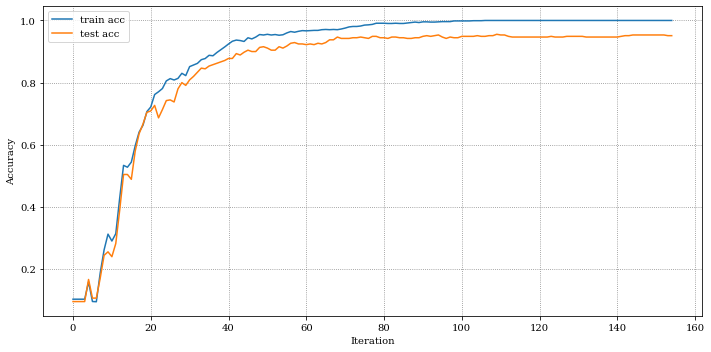

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label="train acc")
ax.plot(cb.test_acc, label="test acc")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.legend()

fig.tight_layout()
plt.show()

## Эксперименты с числом слоев (1 балл)

Ясно, что из-за случайного начального приближения с каждым запуском обучения мы будем получать различное качество. Попробуем обучить нашу нейросеть с разным числом слоев несколько раз.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети с $i+1$ полносвязными слоями при $j$-м запуске (все запуски идентичны).

In [50]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [51]:
from tqdm import tqdm, trange

for n_layers in trange(5, desc='all', position=0, colour='green', leave=True):
    for n_run in trange(5, desc=f'n_layers = {n_layers + 1}', position=0, leave=True):
        network = make_network(input_size, hidden_layers_size,
                               output_size, n_layers + 1, ReLU)
        res = minimize(
            compute_loss_grad, get_weights(network),  
            args=[network, X_train, y_train], 
            method="L-BFGS-B",
            jac=True,
        )
        accs_train[n_layers, n_run] = (predict(network, X_train) == y_train).mean()
        accs_test[n_layers, n_run] = (predict(network, X_test) == y_test).mean()

all: 100%|██████████| 5/5 [01:04<00:00, 12.87s/it]


Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

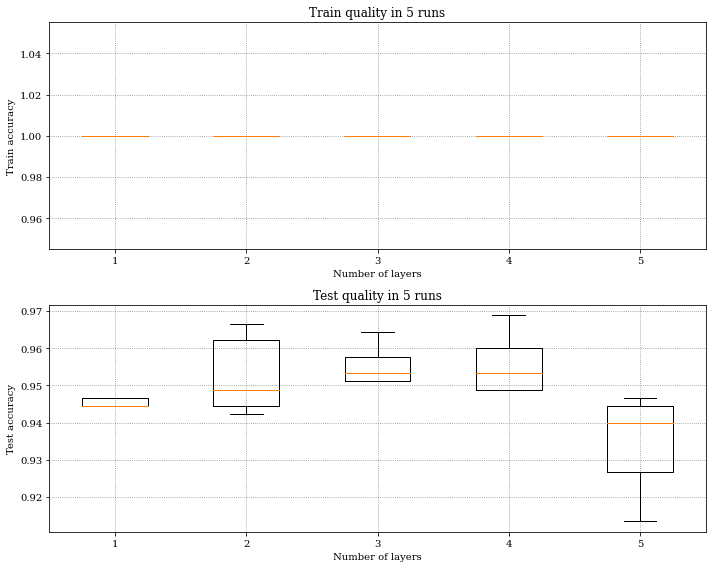

In [49]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Number of layers")
axes[1].set_xlabel("Number of layers")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как изменяются качество на обучении и контроле и устойчивость процесса обучения при увеличении числа слоев?
* Можно ли сказать, что логистическая регрессия (линейная модель) дает качество хуже, чем нелинейная модель?

__Ответы:__

* <font color=blue>Качество на обучении стабильно идеальное: нейросеть благополучно переобучается.</font>
* <font color=blue>Качество на контроле демонстрирует bias-variance tradeoff. Действительно, число полносвязных слоев ($\iff$ число параметров сети) можно рассматривать как меру сложности модели. И с ростом сложности уменьшается смещение, но увеличивается разброс. Оптимум качества в нашем случае достигается при $\approx 3$ слоях (иногда 2- или 4-слойная сеть тоже хорошо обучаются).</font>
* <font color=blue>И хотя логистическая регрессия дает не лучшее качество в нашем эксперименте, она имеет небольшой разброс в силу простоты. И показала результат лучше, чем 5-слойная сеть.</font>

## Эксперименты c различными инициализациями весов (1 балл)

Как уже было сказано, начальная инициализация весов нейронной сети может сильно влиять на процесс ее обучения и, как следствие, на ее качество.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными инициализациями слоев.

Для этого необходимо реализовать функцию, инициализирующую веса линейных слоёв нашей нейронной сети. Добавьте в функционал данного метода возможность инициализировать его веса с помощью инициализации Kaiming (используется, если в нейронной сети в качестве функций активации используется ReLU) и инициализации Xavier (используется, если в нейронной сети в качестве функций активации используется Tanh или Sigmoid):

In [52]:
def initialize_network(network, initialization):
    for layer in network:
        if isinstance(layer, Dense):
            input_units, output_units = layer.weights.shape
            if initialization == 'Kaiming':
                layer.weights = np.random.normal(scale=np.sqrt(2 / input_units),
                                                 size=(input_units, output_units))
            elif initialization == 'Xavier':
                lim = np.sqrt(6 / (input_units + output_units))
                layer.weights = np.random.uniform(low=-lim, high=lim,
                                                  size=(input_units, output_units))
            else:
                # Initialize weights with small random numbers from normal distribution.
                # In this case `initialization` represents a standard deviation
                # for normal distribution.
                layer.weights = np.random.randn(input_units, output_units) * initialization
            layer.biases = np.zeros_like(layer.biases)
            
            layer.params = [layer.weights, layer.biases]

Теперь попробуйте для каждой из 3 инициализаций обучить нейронную сеть несколько раз. Попробуйте проделать данную операцию при зафиксированном числе слоев равным 3, 4 и 5.

### 3 слоя

Зафиксируйте в сети число слоев равное трем.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с инициализацией Kaiming при $i = 3$, с инициализацией Xavier при $i = 4$ и с инициализацией из нормального распределения с фиксированными параметрами при $0 \leqslant i \leqslant 2$ (попробуйте здесь 3 разных параметра для стандартного отклонения для нормального распределения, например: `1e-3`, `1e-2`, `1e-1`). Заметьте, что при большом числе слоев слишком низкое стандартное отклонение может не давать нейронной сети нормально обучиться.

In [53]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [54]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [55]:
for var_ind in trange(len(init_vars), desc='all', position=0, colour='green', leave=True):
    for n_run in trange(5, desc=f'init: {init_vars[var_ind]}', position=0, leave=True):
        network = make_network(input_size, hidden_layers_size,
                               output_size, 3, ReLU)
        initialize_network(network, init_vars[var_ind])
        res = minimize(
            compute_loss_grad, get_weights(network),  
            args=[network, X_train, y_train], 
            method="L-BFGS-B",
            jac=True,
        )
        accs_train[var_ind, n_run] = (predict(network, X_train) == y_train).mean()
        accs_test[var_ind, n_run] = (predict(network, X_test) == y_test).mean()

all: 100%|██████████| 5/5 [00:26<00:00,  5.25s/it]


Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

<font color=blue>Немного модифицируем код для построения графиков, чтобы получить и боксплоты на обучении, поскольку далее ставится вопрос о качестве на трейне. Хотя уже известно, что наша нейросеть обычно идеально настраивается на выборку.</font>

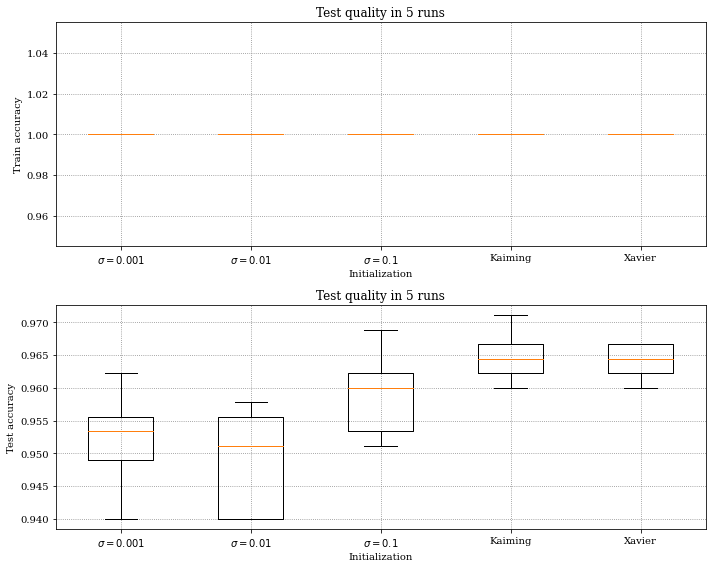

In [56]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].boxplot(accs_train.T, labels=init_vars_for_plot, showfliers=False)
ax[0].set_ylabel("Train accuracy")
ax[1].boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)
ax[1].set_ylabel("Test accuracy")

for i in range(2):
    ax[i].set_title("Test quality in 5 runs")
    ax[i].set_xlabel("Initialization")
    ax[i].grid(True)

fig.tight_layout()
plt.show()

### 4 слоя

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 4 слоями в сети.

In [58]:
init_vars = [5e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [59]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [60]:
for var_ind in trange(len(init_vars), desc='all', position=0, colour='green', leave=True):
    for n_run in trange(5, desc=f'init: {init_vars[var_ind]}', position=0, leave=True):
        network = make_network(input_size, hidden_layers_size,
                               output_size, 4, ReLU)
        initialize_network(network, init_vars[var_ind])
        res = minimize(
            compute_loss_grad, get_weights(network),  
            args=[network, X_train, y_train], 
            method="L-BFGS-B",
            jac=True,
        )
        accs_train[var_ind, n_run] = (predict(network, X_train) == y_train).mean()
        accs_test[var_ind, n_run] = (predict(network, X_test) == y_test).mean()

all: 100%|██████████| 5/5 [00:50<00:00, 10.10s/it]


Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

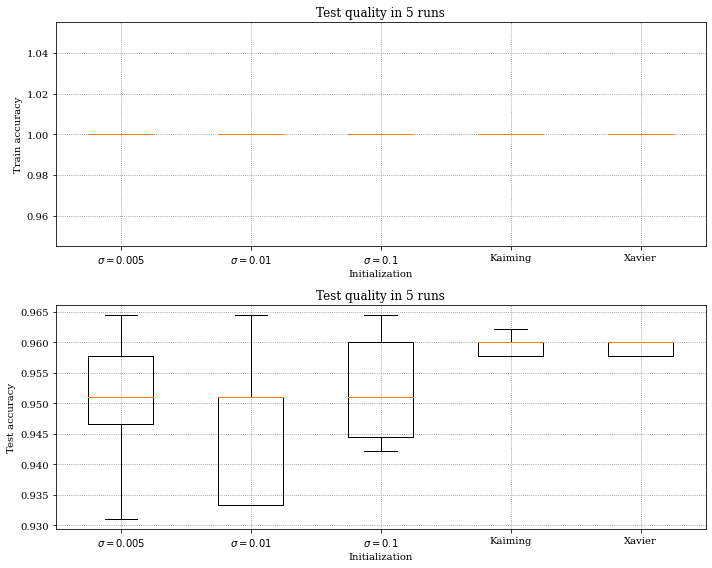

In [61]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].boxplot(accs_train.T, labels=init_vars_for_plot, showfliers=False)
ax[0].set_ylabel("Train accuracy")
ax[1].boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)
ax[1].set_ylabel("Test accuracy")

for i in range(2):
    ax[i].set_title("Test quality in 5 runs")
    ax[i].set_xlabel("Initialization")
    ax[i].grid(True)

fig.tight_layout()
plt.show()

### 5 слоев

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 5 слоями в сети.

In [62]:
init_vars = [1e-2, 1e-1, 1e0, 'Kaiming', 'Xavier']

In [63]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [64]:
for var_ind in trange(len(init_vars), desc='all', position=0, colour='green', leave=True):
    for n_run in trange(5, desc=f'init: {init_vars[var_ind]}', position=0, leave=True):
        network = make_network(input_size, hidden_layers_size,
                               output_size, 5, ReLU)
        initialize_network(network, init_vars[var_ind])
        res = minimize(
            compute_loss_grad, get_weights(network),  
            args=[network, X_train, y_train], 
            method="L-BFGS-B",
            jac=True,
        )
        accs_train[var_ind, n_run] = (predict(network, X_train) == y_train).mean()
        accs_test[var_ind, n_run] = (predict(network, X_test) == y_test).mean()

all: 100%|██████████| 5/5 [03:25<00:00, 41.05s/it]


Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

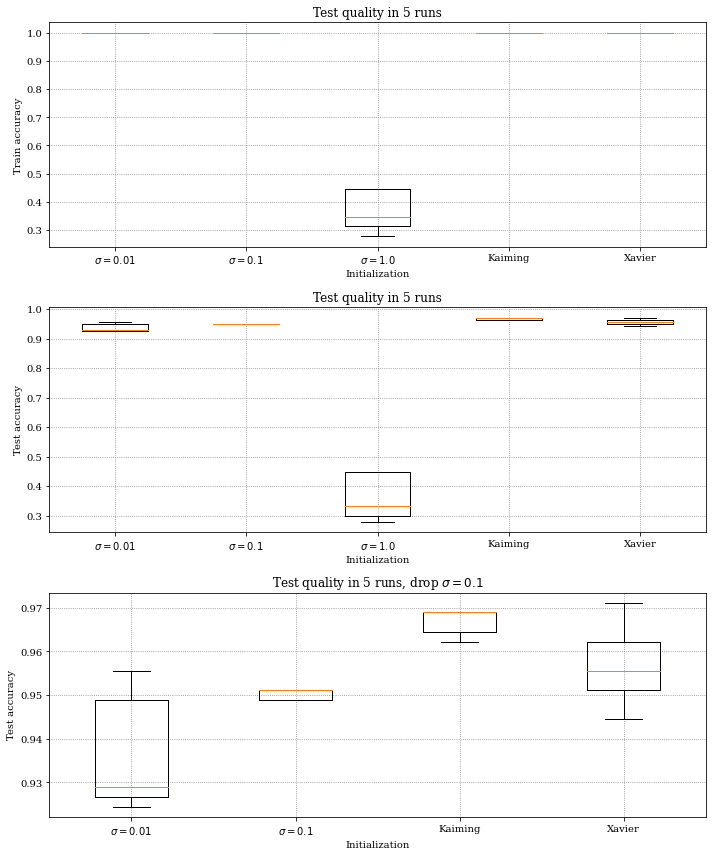

In [72]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(3, 1, figsize=(10, 12))

ax[0].boxplot(accs_train.T, labels=init_vars_for_plot, showfliers=False)
ax[0].set_ylabel("Train accuracy")
ax[1].boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)
ax[1].set_ylabel("Test accuracy")

ax[2].boxplot(np.delete(accs_test, 2, axis=0).T, 
              labels=init_vars_for_plot[:2] + init_vars_for_plot[3:],
              showfliers=False)
ax[2].set_ylabel("Test accuracy")

for i in range(3):
    ax[i].set_title("Test quality in 5 runs")
    ax[i].set_xlabel("Initialization")

ax[2].set_title("Test quality in 5 runs, drop $\sigma=0.1$")

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных инициализациях?
* Какие инициализации помогают обучать более глубокие сети?

__Ответы:__

* <font color=blue>Практически всегда качество на обучении идеальное, но на некоторых запусках на обучении можно получить совсем плохую классификацию (например, 5 слоев и $\sigma=1.0$), что свидетельствовует о неудачном локальном минимуме ($\leftarrow$ неудачная инициализация).</font>
* <font color=blue>Эксперимент показал, что «умные» инициализации (Kaiming и Xavier) дают более устойчивые результаты, чем инициализация с безосновательным разбросом. Таким образом, использование инициализаций, учитывающих число входов-выходов, надежнее, особенно на глубоких сетях.</font>
* <font color=blue>Ожидаемо, в среднем лучшее качество получается с инициализацией Kaiming. На 5-слойной (в нашем случае глубокой) сети маленький разброс получился у $\sigma=0.1$ — такая инициализация достаточно близка к Kaiming, учитывая ширину сети.</font>

Теперь сравним скорость обучения при различных инициализациях. Создайте два списка списков `accs_test_on_iterations`, `accs_train_on_iterations` в каждом из которых в позиции `[i]` (см. описание `i` в предыдущем пункте) будет лежать список из значений `accuracy` на тестовой и обучающей выборках соотвественно, полученных во время обучения модели. Количество слоев в сети зафиксируйте равным 4.

In [118]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [119]:
accs_test_on_iterations = []
accs_train_on_iterations = []

In [120]:
for var_ind in trange(len(init_vars), desc='all', position=0, colour='green', leave=True):
    network = make_network(input_size, hidden_layers_size,
                           output_size, 4, ReLU)
    initialize_network(network, init_vars[var_ind])
    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
    res = minimize(
        compute_loss_grad, get_weights(network),  
        args=[network, X_train, y_train], 
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_train_on_iterations += [cb.train_acc]
    accs_test_on_iterations += [cb.test_acc]

all: 100%|██████████| 5/5 [00:09<00:00,  1.95s/it]


<font color=blue>Снова построим также графики для трейна.</font>

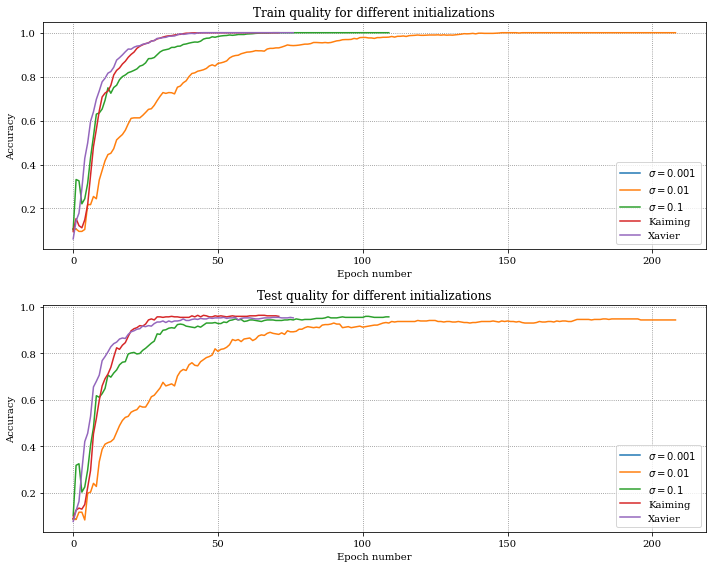

In [121]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

for idx, label in enumerate(init_vars_for_plot):
    ax[0].plot(accs_train_on_iterations[idx], label=label)
ax[0].set_title("Train quality for different initializations")

for idx, label in enumerate(init_vars_for_plot):
    ax[1].plot(accs_test_on_iterations[idx], label=label)
ax[1].set_title("Test quality for different initializations")

for i in range(2):
    ax[i].set_xlabel("Epoch number")
    ax[i].set_ylabel("Accuracy")
    ax[i].grid(True)
    ax[i].legend()

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как меняется скорость обучения в зависимости от выбранной инициализации?

__Ответы:__

<font color=blue>Получилось, с Kaiming сходимость происходит быстрее всего. Просто «сигмы» сходятся хуже, причем инициализация со слишком малым разбросом не позволила сети обучиться вообще. С чуть большей дисперсией ($\sigma=0.01$) веса уже сошлись, но для этого понадобилось достаточно много итераций.</font>

## Эксперименты c различными функциями активации (1 балл)

Проверим теперь, с какой функцией активации нейронная сеть будет обучаться лучше.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными функциями активации.

Для этого нам нужно реализовать еще 2 слоя: для функций активации `Tanh` и `Sigmoid`.

In [122]:
class Tanh:
    """
    tanh(y) = (e^y - e^(-y)) / (e^y + e^(-y))
    Используйте функцию np.tanh для подсчета гиперболического тангенса.
    Вы можете сами реализовать подсчет tanh, но тогда вам нужно устойчиво его вычислять.
    """
    def __init__(self):
        self.params = [] # Tanh has no parameters

    def forward(self, input):
        """
        Apply elementwise Tanh to [batch, num_units] matrix
        """
        self.input = input
        self.output = np.tanh(input)
        return self.output

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Tanh input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return grad_output * (1 - self.output ** 2), []

    def __repr__(self):
        return 'Tanh()'

In [123]:
from scipy.special import expit
    
class Sigmoid:
    """
    sigmoid(y) = 1 / (1 + e^(-y))
    Используйте функцию expit для подсчета сигмоиды.
    Вы можете сами реализовать подсчет сигмоиды, но тогда вам нужно устойчиво ее вычислять.
    """
    def __init__(self):
        self.params = [] # Sigmoid has no parameters

    def forward(self, input):
        """
        Apply elementwise Sigmoid to [batch, num_units] matrix
        """
        self.input = input
        self.output = expit(input)
        return self.output

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Sigmoid input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return grad_output * self.output * (1 - self.output), []

    def __repr__(self):
        return 'Sigmoid()'

Теперь попробуйте для каждой из 3 функций активации обучить нейронную сеть несколько раз. Число слоев зафиксируйте равным 3. В случае `Tanh` и `Sigmoid` используйте инициализацию `Xavier`, а в случае `ReLU` используйте инициализацию `Kaiming`.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с функцией активации $ReLU$ при $i = 0$, с функцией активации $Tanh$ при $i = 1$ и с функцией активации $Sigmoid$ при $i = 2$.

In [124]:
act_func_vars = ['Tanh', 'Sigmoid', 'ReLU']
init_for_act_funcs = ['Xavier', 'Xavier', 'Kaiming']

In [125]:
accs_train = np.zeros((3, 5))
accs_test = np.zeros((3, 5))

In [126]:
loop = list(zip(range(3), [Tanh, Sigmoid, ReLU], act_func_vars, init_for_act_funcs))

for i, act_class, act_name, init in tqdm(loop, desc='all', position=0, colour='green', leave=True):
    for j in trange(5, desc=act_name, position=0, leave=True):
        network = make_network(input_size, hidden_layers_size,
                               output_size, 3, act_class)
        initialize_network(network, init)
        res = minimize(
            compute_loss_grad, get_weights(network),  
            args=[network, X_train, y_train], 
            method="L-BFGS-B",
            jac=True,
        )
        accs_train[i, j] = (predict(network, X_train) == y_train).mean()
        accs_test[i, j] = (predict(network, X_test) == y_test).mean()
        pass

all:   0%|          | 0/3 [00:00<?, ?it/s]

ReLU: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

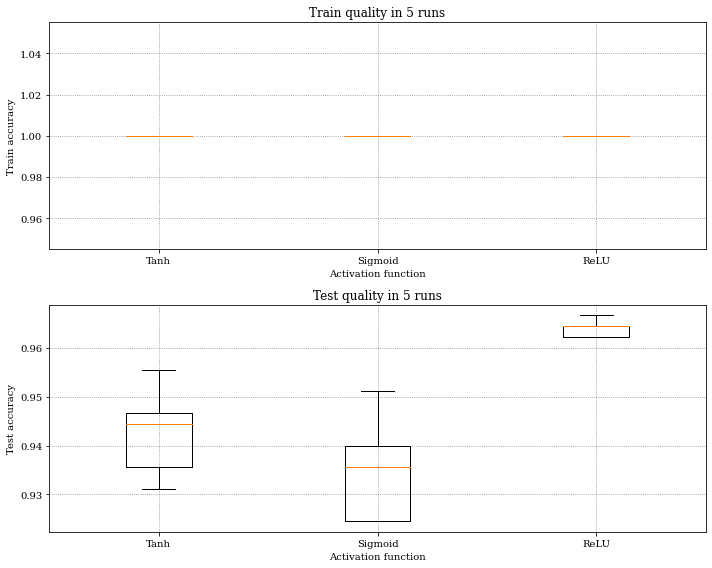

In [127]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].boxplot(accs_train.T, labels=act_func_vars, showfliers=False)
ax[1].boxplot(accs_test.T, labels=act_func_vars, showfliers=False)

for i, dataset in enumerate(['Train', 'Test']):
    ax[i].set_title(f"{dataset} quality in 5 runs")
    ax[i].set_xlabel("Activation function")
    ax[i].set_ylabel(f"{dataset} accuracy")
    ax[i].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных функциях активации?

__Ответы:__

* <font color=blue>Графики показывают, что ReLU дает лучшее качество и достаточно устойчива. Фактическое время работы тоже существенно меньше (видно по результатам tqdm).</font>
* <font color=blue>У тангенса и сигмоиды большой разброс в качестве, и в среднем они сработали хуже.</font>
* <font color=blue>По графикам обучения видно, что со всеми функциями активации сеть может идеально настроиться на выборку.</font>

\* Несколько фрагментов кода в задании написаны на основе материалов [курса по глубинному обучению на ФКН НИУ ВШЭ](https://www.hse.ru/ba/ami/courses/205504078.html)

## Бонусная часть

## Реализация метода оптимизации (1 балл)

Реализуйте сами метод оптимизации (аналог функции `minimize`) для рассмотренной выше архитектуры. В качестве метода оптимизации используйте SGD + momentum. Продемонстрируйте правильную работу метода оптимизации, сравните его работу с LBFGS-B. Сделайте выводы.

![meme](https://i.kym-cdn.com/entries/icons/facebook/000/030/710/dd0.jpg)

## Dropout (1 балл) 

Реализуйте слой Dropout. Сравните обучение сети из большого числа слоёв при использовании Dropout и без его использования (предварительно подберите адекватный параметр $p$). Сделайте выводы.

<font color=blue>Реализуем в форме Inverted dropout.</font>

In [155]:
class Dropout:
    """
    Randomly turn off activation with pobability p
    during training.
    """
    def __init__(self, p=0.5):
        """
        p: probability of activation to zeroed.
        """
        self.p = p
        self.params = []
        self.inference_mode = False

    def forward(self, input):
        """
        Apply drop-out only during training!
        input shape: [batch, num_units]
        output shape: [batch, num_units]
        """
        if self.inference_mode:
            return input
        self.drop = (np.random.uniform(0, 1, input.shape) > self.p) / (1 - self.p)
        return input * self.drop

    def backward(self, grad_output):
        """
        Compute gradients
        grad_output shape: [batch, num_units]
        output shapes: [batch, num_units], []
        """
        assert not self.inference_mode
        return self.drop * grad_output, []
    
    def __repr__(self):
        return 'Dropout()'

<font color=blue>Для тестирования воспользуемся callback с включением режима инференса при оценивании качества.</font>

In [156]:
class CallbackInf:
    def __init__(self, network, X_train, y_train, X_test, y_test, name):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.train_acc = []
        self.test_acc = []
        self.it_counter = 0

    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        self.it_counter += 1
        for layer in self.network:
            layer.inference_mode = True
        self.train_acc += [(predict(self.network, self.X_train) == self.y_train).mean()]
        self.test_acc += [(predict(self.network, self.X_test) == self.y_test).mean()]
        for layer in self.network:
            layer.inference_mode = False
        if self.it_counter % 10 == 0:
            print(f'[{name}] it: {self.it_counter}, ' +
                  f'train: {self.train_acc[-1]:.3f}, ' +
                  f'test: {self.test_acc[-1]:.3f}')

<font color=blue>Поэкспериментируем с разной вероятностью отключения нейронов.</font>

In [157]:
nn_5_no_dropout = (
    [Dense(input_size, hidden_layers_size), ReLU()] +
    sum([[Dense(hidden_layers_size, hidden_layers_size),
          ReLU()] for i in range(3)], []) +
    [Dense(hidden_layers_size, output_size), LogSoftmax()]
)

nn_5_dropout_small = (
    [Dense(input_size, hidden_layers_size), ReLU(), Dropout(p=0.1)] +
    sum([[Dense(hidden_layers_size, hidden_layers_size),
          ReLU(),
          Dropout(p=0.2)] for i in range(3)], []) +
    [Dense(hidden_layers_size, output_size), LogSoftmax()]
)

nn_5_dropout_med = (
    [Dense(input_size, hidden_layers_size), ReLU(), Dropout(p=0.5)] +
    sum([[Dense(hidden_layers_size, hidden_layers_size),
          ReLU(),
          Dropout(p=0.2)] for i in range(3)], []) +
    [Dense(hidden_layers_size, output_size), LogSoftmax()]
)

nn_5_dropout_high = (
    [Dense(input_size, hidden_layers_size), ReLU(), Dropout(p=0.9)] +
    sum([[Dense(hidden_layers_size, hidden_layers_size),
          ReLU(),
          Dropout(p=0.2)] for i in range(3)], []) +
    [Dense(hidden_layers_size, output_size), LogSoftmax()]
)


networks = [nn_5_no_dropout, nn_5_dropout_small,
            nn_5_dropout_med, nn_5_dropout_high]

for network in networks:
    print(network)

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]
[Dense(64, 32), Relu(), Dropout(), Dense(32, 32), Relu(), Dropout(), Dense(32, 32), Relu(), Dropout(), Dense(32, 32), Relu(), Dropout(), Dense(32, 10), LogSoftmax()]
[Dense(64, 32), Relu(), Dropout(), Dense(32, 32), Relu(), Dropout(), Dense(32, 32), Relu(), Dropout(), Dense(32, 32), Relu(), Dropout(), Dense(32, 10), LogSoftmax()]
[Dense(64, 32), Relu(), Dropout(), Dense(32, 32), Relu(), Dropout(), Dense(32, 32), Relu(), Dropout(), Dense(32, 32), Relu(), Dropout(), Dense(32, 10), LogSoftmax()]


<font color=blue>Инициализировать сети будем одинаковым образом</font>

In [158]:
nn_names = ['no dropout', '$p=0.1$', '$p=0.5$', '$p=0.9$']
accs_train = []
accs_test = []

for network, name in zip(networks, nn_names):
    np.random.seed(0)
    initialize_network(network, 'Kaiming')
    cb = CallbackInf(network, X_train, y_train, X_test, y_test, name)
    res = minimize(
        compute_loss_grad, get_weights(network),
        args=[network, X_train, y_train],
        method="L-BFGS-B",
        jac=True,
        callback=cb.call,
    )
    accs_train.append(cb.train_acc)
    accs_test.append(cb.test_acc)

[no dropout] it: 10, train: 0.623, test: 0.536
[no dropout] it: 20, train: 0.910, test: 0.869
[no dropout] it: 30, train: 0.977, test: 0.918
[no dropout] it: 40, train: 0.996, test: 0.949
[no dropout] it: 50, train: 1.000, test: 0.956
[no dropout] it: 60, train: 1.000, test: 0.958
[no dropout] it: 70, train: 1.000, test: 0.962
[$p=0.1$] it: 10, train: 0.451, test: 0.420
[$p=0.1$] it: 20, train: 0.759, test: 0.727
[$p=0.5$] it: 10, train: 0.295, test: 0.276
[$p=0.5$] it: 20, train: 0.484, test: 0.489


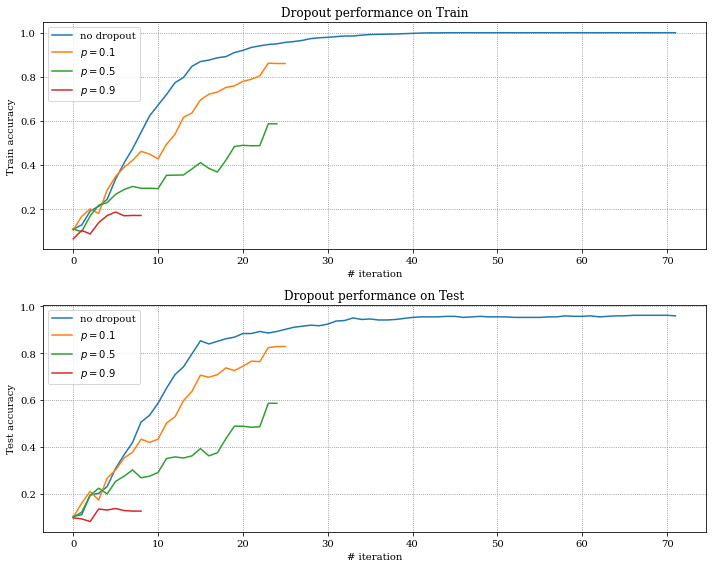

In [159]:
plt.figure(figsize=(10, 8))
fig_loop = zip(range(1, 3), ['Train', 'Test'], [accs_train, accs_test])

for subfig, dataset, accs in fig_loop:
    plt.subplot(2, 1, subfig)
    for nn_name, acc in zip(nn_names, accs):
        plt.plot(acc, label=nn_name)
    plt.legend()
    plt.grid(True)
    plt.xlabel(f'# iteration')
    plt.ylabel(f'{dataset} accuracy')
    plt.title(f'Dropout performance on {dataset}')
plt.tight_layout()

<font color=blue>В нашем эксперименте получилось, что `dropout` ухудшает сходимость сети, пропорционально вероятности отключения нейрона. Это может быть связано с тем, что `dropout` — техника регуляризации, в то время как у нас тест и трейн взяты из однородной выборки и переобучение не является проблемой.</font>

## BatchNormalization (1 балл)

Реализуйте слой `BatchNormalization`. Сравните обучение сети из большого числа слоёв при использовании `BatchNormalization` и без его использования. Сделайте выводы.

<font color=blue>Будет страшно, но напишем слой батч-нормализации. Реализация совпадает с первым теоретическим заданием, но обобщена на случай нескольких признаков. Также имеем в виду, что слой по-разному работает на обучении и тестировании.</font>

In [164]:
class BatchNorm:
    """
    Apply batch normalization per-dimension.
    """
    def __init__(self, num_units, eps=1e-5, momentum=0.1):
        """
        Gamma (scale) and delta (shift) a learnable parameters.
        Eps is for numerical stability (default 1e-5).
        The layer acts differently depending on training or inference.
        Momentum is for updating moving average of variance and mean, 
        which will be used during inference.
        """
        self.eps = eps
        self.momentum = momentum
        self.gamma = np.ones(num_units)
        self.delta = np.zeros(num_units)
        self.params = [self.gamma, self.delta]
        self.inference_mode = False
        self.mean = None
        self.var = None
        self.moving_mean = None
        self.moving_var = None
    
    def _normalize(self, data):
        if self.inference_mode:
            mean, var = self.moving_mean, self.moving_var
        else:
            mean, var = self.mean, self.var
        return (data - mean) / np.sqrt(var + self.eps)

    def forward(self, input):
        """
        Perform normalization:
        y = gamma * (x - E(x)) / sqrt(Var(x) + eps) + delta
        input shape: [batch, num_units]
        output shape: [batch, num_units]
        """
        self.input = input
        if not self.inference_mode:
            self.mean = input.mean(axis=0)
            self.var = ((input - self.mean) ** 2).mean(axis=0)
            if self.moving_mean is None:
                self.moving_mean = self.mean
                self.moving_var = self.var
            else:
                self.moving_mean = (self.momentum * self.mean
                                    + (1 - self.momentum) * self.moving_mean)
                self.moving_var = (self.momentum * self.var
                                   + (1 - self.momentum) * self.moving_var)
        return self.gamma * self._normalize(input) + self.delta

    def backward(self, grad_output):
        """
        compute gradients
        grad_output shape: [batch, num_units]
        output shapes: [batch, num_units], [num_params]
        """
        assert not self.inference_mode
        dL_dgamma = grad_output.sum(axis=0)
        dL_ddelta = (grad_output * self._normalize(self.input)).sum(axis=0)
        dL_dX_1 = ((grad_output - grad_output.mean(axis=0))
                   / np.sqrt(self.var + self.eps))
        centered = self.input - self.mean
        denom =  1 / (grad_output.shape[0]) * np.power(self.var + self.eps, -1.5)
        dL_dX_2_list = [np.outer(centered[:, i], centered[:, i]) @ grad_output[:, i]
                        for i in range(centered.shape[1])]
        dL_dX_2 = np.stack(dL_dX_2_list, axis=1) * denom
        return self.gamma * (dL_dX_1 - dL_dX_2), np.r_[dL_dgamma, dL_ddelta]
    
    def __repr__(self):
        return 'BatchNorm()'

<font color=blue>Сделаем 3 нейросети с пятью полносвязными слоями. Первая — без батч-нормализации, у второй — батч-нормализация делается на входах полносвязного слоя, у третьей — на его выходах, то есть перед активациями.</font>

In [165]:
nn_5 = (
    [Dense(input_size, hidden_layers_size), ReLU()] +
    sum([[Dense(hidden_layers_size, hidden_layers_size),
          ReLU()] for i in range(3)], []) +
    [Dense(hidden_layers_size, output_size), LogSoftmax()]
)
nn_5_bn_dense = (
    [Dense(input_size, hidden_layers_size), ReLU()] +
    sum([[BatchNorm(hidden_layers_size),
          Dense(hidden_layers_size, hidden_layers_size),
          ReLU()] for i in range(3)], []) +
    [BatchNorm(hidden_layers_size), Dense(hidden_layers_size, output_size), LogSoftmax()]
)
nn_5_bn_relu = (
    [Dense(input_size, hidden_layers_size), BatchNorm(hidden_layers_size), ReLU()] +
    sum([[Dense(hidden_layers_size, hidden_layers_size),
          BatchNorm(hidden_layers_size),
          ReLU()] for i in range(3)], []) +
    [Dense(hidden_layers_size, output_size), LogSoftmax()]
)
networks = [nn_5, nn_5_bn_dense, nn_5_bn_relu]
for network in networks:
    print(network)

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]
[Dense(64, 32), Relu(), BatchNorm(), Dense(32, 32), Relu(), BatchNorm(), Dense(32, 32), Relu(), BatchNorm(), Dense(32, 32), Relu(), BatchNorm(), Dense(32, 10), LogSoftmax()]
[Dense(64, 32), BatchNorm(), Relu(), Dense(32, 32), BatchNorm(), Relu(), Dense(32, 32), BatchNorm(), Relu(), Dense(32, 32), BatchNorm(), Relu(), Dense(32, 10), LogSoftmax()]


<font color=blue>Будем инициализировать три сети одинаковым образом (число полносвязных слоев совпадает).</font>

In [166]:
nn_names = ['no BN', 'BN b4 Dense', 'BN b4 ReLU']
accs_train = []
accs_test = []

for network, name in zip(networks, nn_names):
    np.random.seed(1)
    initialize_network(network, 'Kaiming')
    cb = CallbackInf(network, X_train, y_train, X_test, y_test, name)
    res = minimize(
        compute_loss_grad, get_weights(network),
        args=[network, X_train, y_train],
        method="L-BFGS-B",
        jac=True,
        callback=cb.call,
    )
    accs_train.append(cb.train_acc)
    accs_test.append(cb.test_acc)

[no BN] it: 10, train: 0.778, test: 0.704
[no BN] it: 20, train: 0.941, test: 0.873
[no BN] it: 30, train: 0.987, test: 0.933
[no BN] it: 40, train: 1.000, test: 0.953
[no BN] it: 50, train: 1.000, test: 0.956
[no BN] it: 60, train: 1.000, test: 0.956
[BN b4 Dense] it: 10, train: 0.880, test: 0.871
[BN b4 Dense] it: 20, train: 1.000, test: 0.960
[BN b4 Dense] it: 30, train: 1.000, test: 0.976
[BN b4 Dense] it: 40, train: 1.000, test: 0.978
[BN b4 Dense] it: 50, train: 1.000, test: 0.980
[BN b4 ReLU] it: 10, train: 0.952, test: 0.896
[BN b4 ReLU] it: 20, train: 0.948, test: 0.896


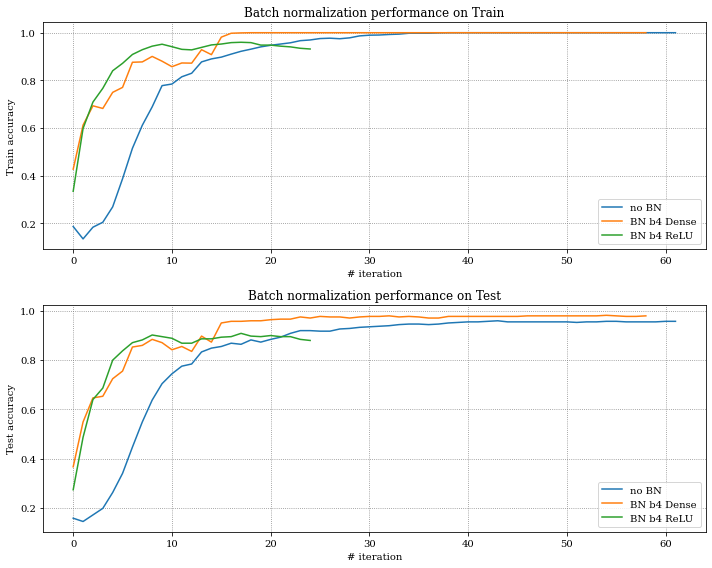

In [167]:
plt.figure(figsize=(10, 8))
fig_loop = zip(range(1, 3), ['Train', 'Test'], [accs_train, accs_test])

for subfig, dataset, accs in fig_loop:
    plt.subplot(2, 1, subfig)
    for nn_name, acc in zip(nn_names, accs):
        plt.plot(acc, label=nn_name)
    plt.legend()
    plt.grid(True)
    plt.xlabel(f'# iteration')
    plt.ylabel(f'{dataset} accuracy')
    plt.title(f'Batch normalization performance on {dataset}')
plt.tight_layout()

<font color=blue>Итак, графики показывают, что батч-нормализация позволяет нейросети обучаться за меньшее число итераций. В оригинальной <a href=https://arxiv.org/pdf/1502.03167.pdf>статье</a> предлагалось делать батч-нормализацию перед активациями. Но в наших экспериментах разумнее оказалось проводить батч-нормализацию с активациями — и полученное качество выше простой полносвязной сети. Если же вставлять слой `BatchNorm` перед `ReLU`, то нейросеть не достигает лучшего качества. В обоих вариантах батч-нормализации заметно существенное ускорение сходимости на начальных итерациях.</font>